In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print("successfully imported libraries")

successfully imported libraries


In [3]:
print("="*60)
print("LOADING DATA")
print("="*60)

df = pd.read_csv('D:\INTERNSHIP\PROJECT_002\Dataset\Cleaned_dataset.csv')
df_clean = df.copy()
df_clean.head(5)

LOADING DATA


,disease,fever,cough,fatigue,difficulty_breathing,age,gender,blood_pressure,cholesterol_level,outcome_variable,age_scaled,bp_scaled,chol_scaled,risk_level
0,Influenza,Yes,No,Yes,Yes,19,female,0,1,Positive,-2.091160,-2.419529,-0.576777,Low
1,Common Cold,No,Yes,Yes,No,25,female,1,1,Negative,-1.631964,-0.723915,-0.576777,Low
2,Eczema,No,Yes,Yes,No,25,female,1,1,Negative,-1.631964,-0.723915,-0.576777,Medium
3,Asthma,Yes,Yes,No,Yes,25,male,1,1,Positive,-1.631964,-0.723915,-0.576777,Medium
4,Asthma,Yes,Yes,No,Yes,25,male,1,1,Positive,-1.631964,-0.723915,-0.576777,Medium


In [4]:
df_clean.shape

(349, 14)

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   disease               349 non-null    object 
 1   fever                 349 non-null    object 
 2   cough                 349 non-null    object 
 3   fatigue               349 non-null    object 
 4   difficulty_breathing  349 non-null    object 
 5   age                   349 non-null    int64  
 6   gender                349 non-null    object 
 7   blood_pressure        349 non-null    int64  
 8   cholesterol_level     349 non-null    int64  
 9   outcome_variable      349 non-null    object 
 10  age_scaled            349 non-null    float64
 11  bp_scaled             349 non-null    float64
 12  chol_scaled           349 non-null    float64
 13  risk_level            349 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 38.3+ KB


In [6]:
df_clean['disease'].nunique()

116

In [7]:
df_clean.describe()

,age,blood_pressure,cholesterol_level,age_scaled,bp_scaled,chol_scaled
count,349.000000,349.000000,349.000000,3.490000e+02,3.490000e+02,3.490000e+02
mean,46.323782,1.426934,1.378223,-8.596142e-12,-8.882523e-11,-1.919771e-10
std,13.085090,0.590604,0.656695,1.001436e+00,1.001436e+00,1.001436e+00
min,19.000000,0.000000,0.000000,-2.091160e+00,-2.419529e+00,-2.101740e+00
25%,35.000000,1.000000,1.000000,-8.666383e-01,-7.239154e-01,-5.767768e-01
50%,45.000000,1.000000,1.000000,-1.013125e-01,-7.239154e-01,-5.767768e-01
75%,55.000000,2.000000,2.000000,6.640134e-01,9.716985e-01,9.481861e-01
max,90.000000,2.000000,2.000000,3.342654e+00,9.716985e-01,9.481861e-01


In [8]:
df_clean['age'].nunique()

26

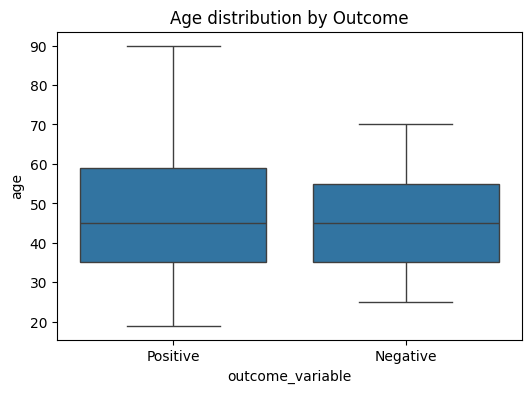

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean,x ='outcome_variable',y='age')
plt.title("Age distribution by Outcome")
plt.show()

#### positive outcome variable has more old age persons as compare to the negative outcome variable are younger
#### median age for positive is around 45 , and for negative it is somewhere between 40-44
#### upper whisker shows that maximum value is 90 , 70 for positive outcome variable , negative outvome variable respectively
#### lower whisker shows that minimum value is 19 , 25 for positive outcome variable , negative outvome variable respectively

In [10]:
df_clean['risk_level'].value_counts()

risk_level
Medium    198
High       90
Low        61
Name: count, dtype: int64

In [11]:
df_clean.columns

Index(['disease', 'fever', 'cough', 'fatigue', 'difficulty_breathing', 'age',
       'gender', 'blood_pressure', 'cholesterol_level', 'outcome_variable',
       'age_scaled', 'bp_scaled', 'chol_scaled', 'risk_level'],
      dtype='object')

In [12]:
print("🔧 Preprocessing data...")

# Convert Yes/No to 1/0, and gender to 1/0 for numeric processing
df_clean['fever'] = df_clean['fever'].map({'Yes': 1, 'No': 0})
df_clean['cough'] = df_clean['cough'].map({'Yes': 1, 'No': 0})
df_clean['fatigue'] = df_clean['fatigue'].map({'Yes': 1, 'No': 0})
df_clean['difficulty_breathing'] = df_clean['difficulty_breathing'].map({'Yes': 1, 'No': 0})
df_clean['gender'] = df_clean['gender'].map({'male': 1, 'female': 0})

# Now our features will be numeric!

le_disease = LabelEncoder()
df_clean['Disease_code'] = le_disease.fit_transform(df_clean['disease'])

print("✅ Data preprocessed successfully\n")

🔧 Preprocessing data...
✅ Data preprocessed successfully



In [13]:
df_clean['risk_level'].nunique()

3

In [14]:
N = 10
top_diseases = df_clean['Disease_code'].value_counts().index[:N]
df_top = df_clean[df_clean['Disease_code'].isin(top_diseases)].copy()  
le_disease = LabelEncoder()
df_top['disease_encoded'] = le_disease.fit_transform(df_top['Disease_code'])

In [15]:
import pandas as pd

# features 
features = ['fever', 'cough', 'fatigue', 'difficulty_breathing',
            'age', 'gender', 'blood_pressure', 'cholesterol_level']

X = df_clean[features]
y = df_clean['Disease_code']


label_counts = y.value_counts()
valid_labels = label_counts[label_counts >= 2].index
mask = y.isin(valid_labels)
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Training samples: {len(X_train)}")
print(f"✅ Testing samples: {len(X_test)}")


✅ Training samples: 230
✅ Testing samples: 58


In [16]:
print(f"✅ Total diseases: {len(le_disease.classes_)}\n")
print("Top 10 Most Common Diseases:")
print(df['disease'].value_counts().head(10))

✅ Total diseases: 10

Top 10 Most Common Diseases:
disease
Asthma             23
Stroke             16
Osteoporosis       14
Hypertension       10
Diabetes           10
Migraine           10
Influenza           8
Pneumonia           8
Bronchitis          8
Hyperthyroidism     7
Name: count, dtype: int64


In [17]:
# print(df_clean[features].isnull().sum())

In [18]:
df_clean.head()

,disease,fever,cough,fatigue,difficulty_breathing,age,gender,blood_pressure,cholesterol_level,outcome_variable,age_scaled,bp_scaled,chol_scaled,risk_level,Disease_code
0,Influenza,1,0,1,1,19,0,0,1,Positive,-2.091160,-2.419529,-0.576777,Low,56
1,Common Cold,0,1,1,0,25,0,1,1,Negative,-1.631964,-0.723915,-0.576777,Low,24
2,Eczema,0,1,1,0,25,0,1,1,Negative,-1.631964,-0.723915,-0.576777,Medium,37
3,Asthma,1,1,0,1,25,1,1,1,Positive,-1.631964,-0.723915,-0.576777,Medium,6
4,Asthma,1,1,0,1,25,1,1,1,Positive,-1.631964,-0.723915,-0.576777,Medium,6


In [19]:
df_clean

,disease,fever,cough,fatigue,difficulty_breathing,age,gender,blood_pressure,cholesterol_level,outcome_variable,age_scaled,bp_scaled,chol_scaled,risk_level,Disease_code
0,Influenza,1,0,1,1,19,0,0,1,Positive,-2.091160,-2.419529,-0.576777,Low,56
1,Common Cold,0,1,1,0,25,0,1,1,Negative,-1.631964,-0.723915,-0.576777,Low,24
2,Eczema,0,1,1,0,25,0,1,1,Negative,-1.631964,-0.723915,-0.576777,Medium,37
3,Asthma,1,1,0,1,25,1,1,1,Positive,-1.631964,-0.723915,-0.576777,Medium,6
4,Asthma,1,1,0,1,25,1,1,1,Positive,-1.631964,-0.723915,-0.576777,Medium,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1,0,1,0,80,0,2,2,Positive,2.577328,0.971698,0.948186,High,101
345,Stroke,1,0,1,0,85,1,2,2,Positive,2.959991,0.971698,0.948186,High,101
346,Stroke,1,0,1,0,85,1,2,2,Positive,2.959991,0.971698,0.948186,High,101
347,Stroke,1,0,1,0,90,0,2,2,Positive,3.342654,0.971698,0.948186,High,101


In [20]:
# Load and preprocess data
print("="*60)
print("LOADING AND PREPROCESSING DATA")
print("="*60)

df = pd.read_csv('D:\INTERNSHIP\PROJECT_002\Dataset\Cleaned_dataset.csv')
df_clean = df.copy()

# Convert categorical features to numeric
df_clean['fever'] = df_clean['fever'].map({'Yes': 1, 'No': 0})
df_clean['cough'] = df_clean['cough'].map({'Yes': 1, 'No': 0})
df_clean['fatigue'] = df_clean['fatigue'].map({'Yes': 1, 'No': 0})
df_clean['difficulty_breathing'] = df_clean['difficulty_breathing'].map({'Yes': 1, 'No': 0})
df_clean['gender'] = df_clean['gender'].map({'male': 1, 'female': 0})

# Encode disease labels
le_disease = LabelEncoder()
df_clean['Disease_code'] = le_disease.fit_transform(df_clean['disease'])

# Select features
features = ['fever', 'cough', 'fatigue', 'difficulty_breathing',
            'age', 'gender', 'blood_pressure', 'cholesterol_level']

X = df_clean[features]
y = df_clean['Disease_code']

# Filter out diseases with less than 2 samples for stratification
label_counts = y.value_counts()
valid_labels = label_counts[label_counts >= 2].index
mask = y.isin(valid_labels)
X = X[mask]
y = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Number of disease classes: {len(np.unique(y))}")
print("\n")

LOADING AND PREPROCESSING DATA

Training samples: 230
Testing samples: 58
Number of disease classes: 55




RANDOM FOREST CLASSIFIER

Accuracy: 0.3103 (31.03%)

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           6       0.56      1.00      0.71         5
          13       0.50      0.50      0.50         2
          16       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         1
          26       0.33      1.00      0.50         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
     

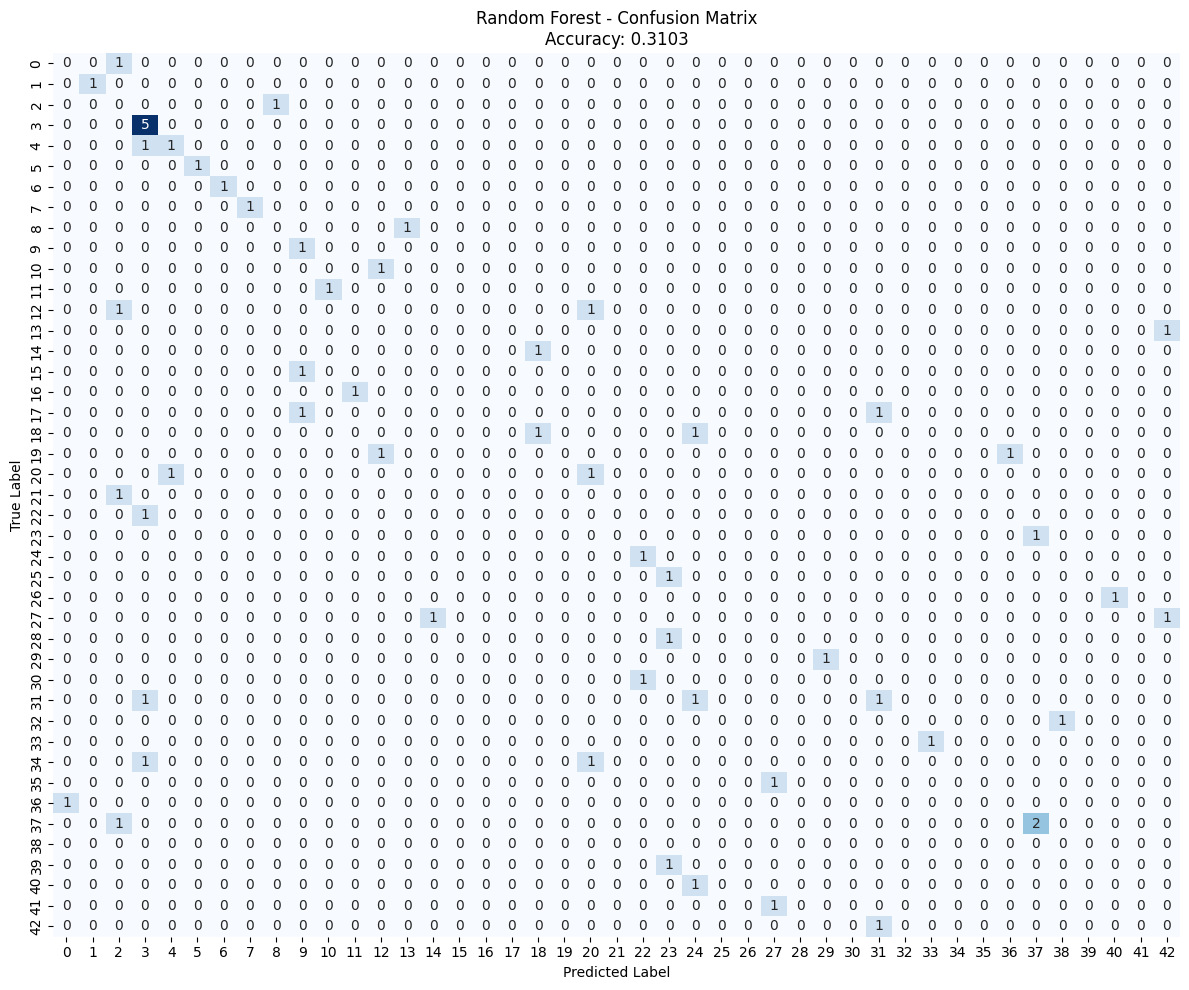

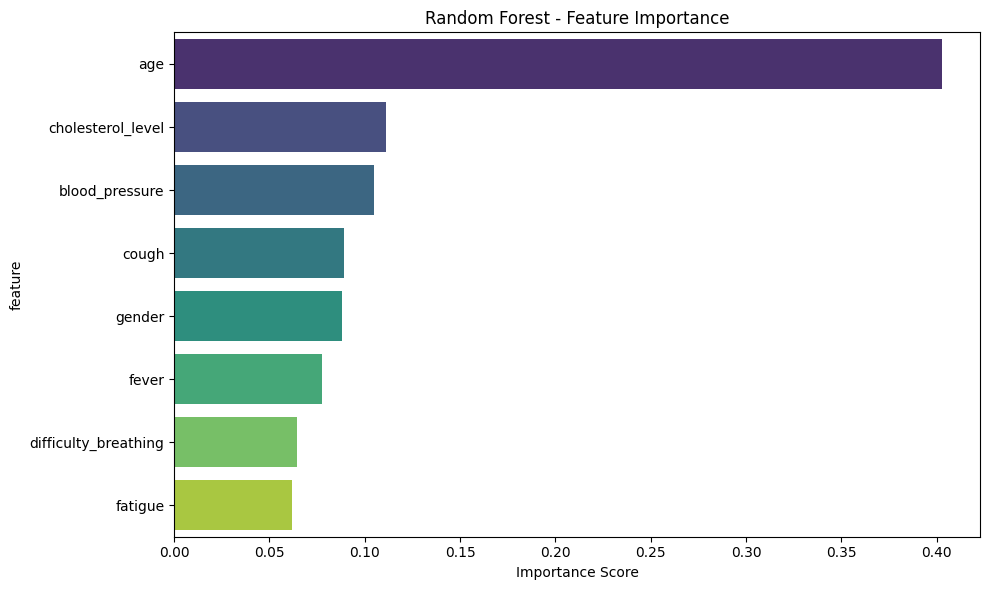

In [21]:
# ============================================================================
# 1. RANDOM FOREST CLASSIFIER
# ============================================================================
print("="*60)
print("RANDOM FOREST CLASSIFIER")
print("="*60)

rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"\nAccuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Random Forest - Confusion Matrix\nAccuracy: {rf_accuracy:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n")

GRADIENT BOOSTING CLASSIFIER

Accuracy: 0.3103 (31.03%)

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           6       0.80      0.80      0.80         5
          13       0.50      0.50      0.50         2
          16       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         1
          26       1.00      1.00      1.00         1
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
 

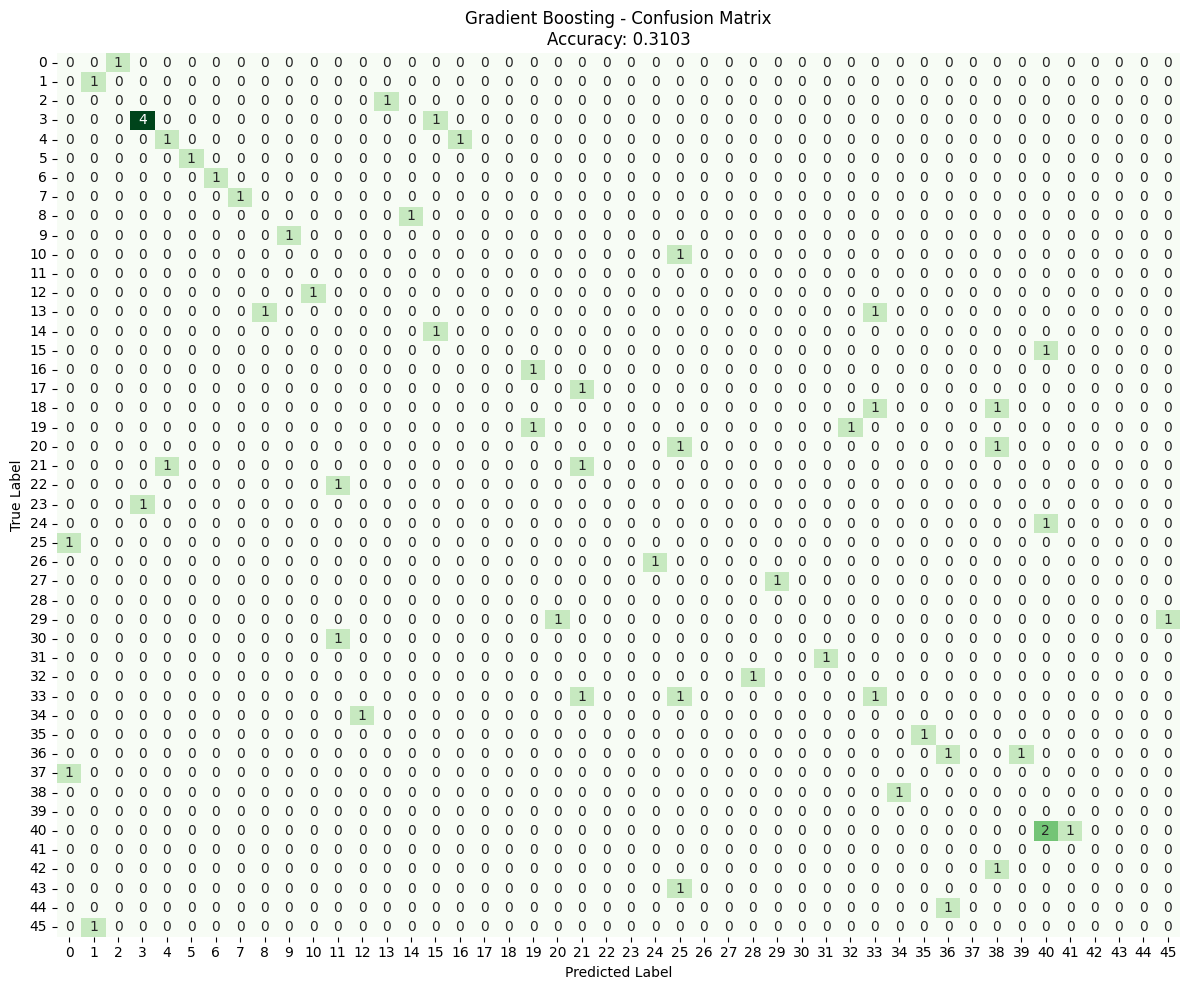

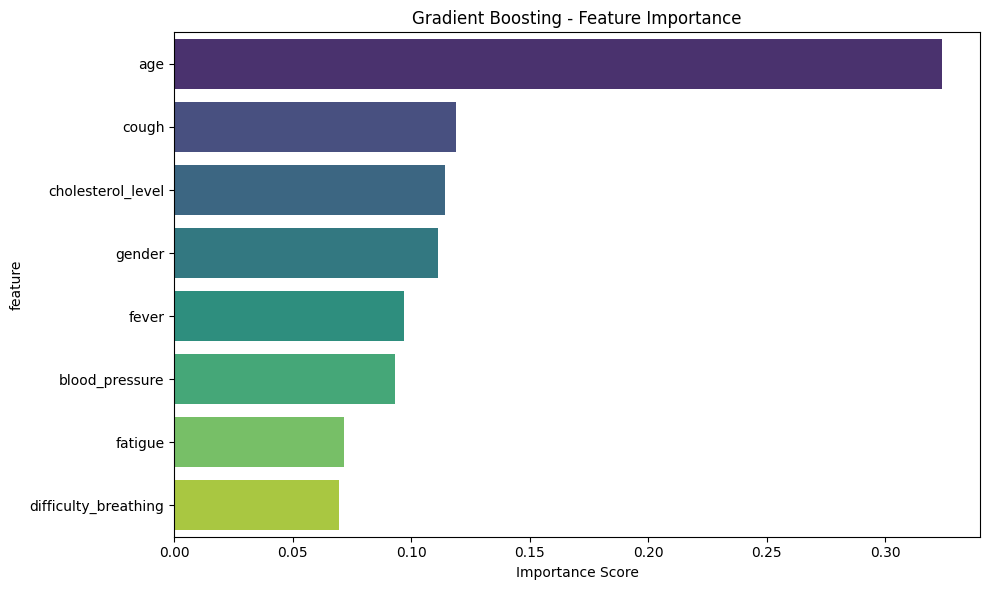

In [22]:
# ============================================================================
# 2. GRADIENT BOOSTING CLASSIFIER
# ============================================================================
print("="*60)
print("GRADIENT BOOSTING CLASSIFIER")
print("="*60)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"\nAccuracy: {gb_accuracy:.4f} ({gb_accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, gb_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm_gb = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'Gradient Boosting - Confusion Matrix\nAccuracy: {gb_accuracy:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('gb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
gb_feature_importance = pd.DataFrame({
    'feature': features,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=gb_feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Gradient Boosting - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('gb_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n")

SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

Accuracy: 0.1552 (15.52%)

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.29      1.00      0.45         5
          13       0.25      0.50      0.33         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          46       0.00      0.00      0.00 

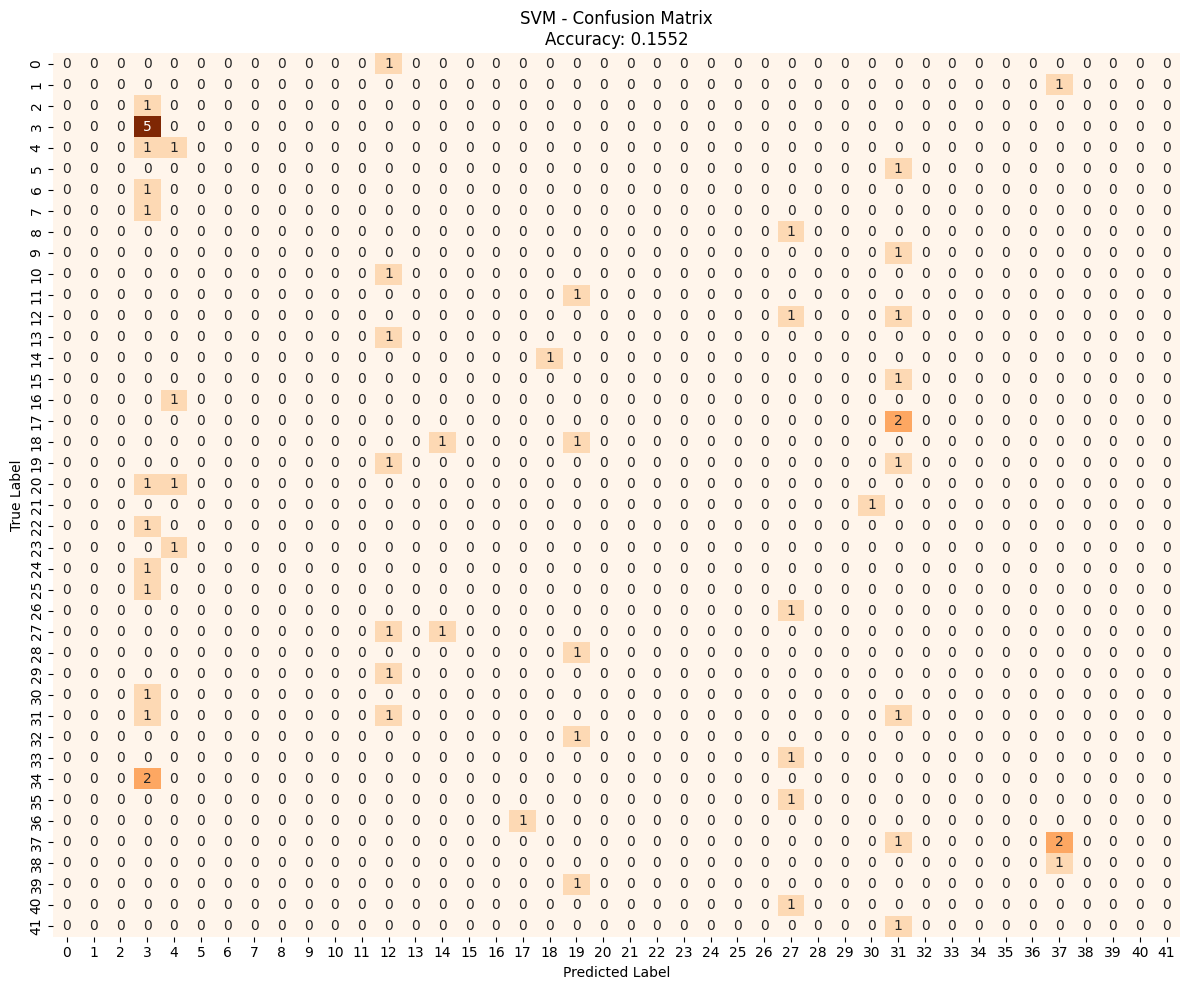

In [23]:
# ============================================================================
# 3. SUPPORT VECTOR MACHINE (SVM) CLASSIFIER
# ============================================================================
print("="*60)
print("SUPPORT VECTOR MACHINE (SVM) CLASSIFIER")
print("="*60)

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"\nAccuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(12, 10))
cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title(f'SVM - Confusion Matrix\nAccuracy: {svm_accuracy:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n")

MODEL COMPARISON SUMMARY

             Model  Accuracy  Accuracy (%)
    Random Forest  0.310345     31.034483
Gradient Boosting  0.310345     31.034483
              SVM  0.155172     15.517241


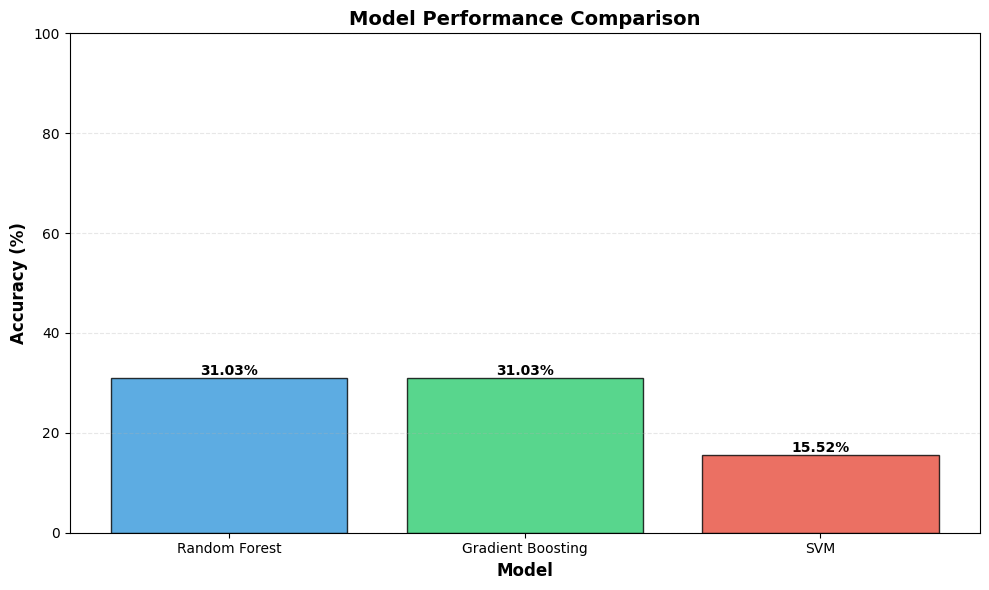


BEST MODEL: Random Forest
ACCURACY: 31.03%


In [24]:
# ============================================================================
# MODEL COMPARISON
# ============================================================================
print("="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy': [rf_accuracy, gb_accuracy, svm_accuracy],
    'Accuracy (%)': [rf_accuracy*100, gb_accuracy*100, svm_accuracy*100]
})

print("\n", comparison_df.to_string(index=False))

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy (%)'], 
               color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Best model
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy (%)']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model}")
print(f"ACCURACY: {best_accuracy:.2f}%")
print(f"{'='*60}")